In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import norm
import yfinance as yf
%matplotlib inline

In [46]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2007-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [47]:
log_returns = np.log(1 + data.pct_change())

In [48]:
log_returns.tail()

,PG
Date,
2024-08-27,-0.006478
2024-08-28,-0.001123
2024-08-29,0.005721
2024-08-30,0.008842
2024-09-03,0.011073


<Axes: xlabel='Date'>

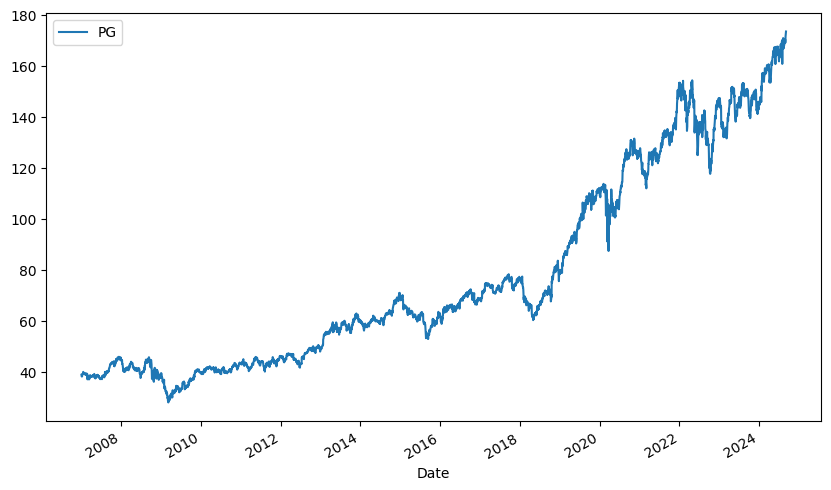

In [49]:
data.plot(figsize=(10,6))

<Axes: xlabel='Date'>

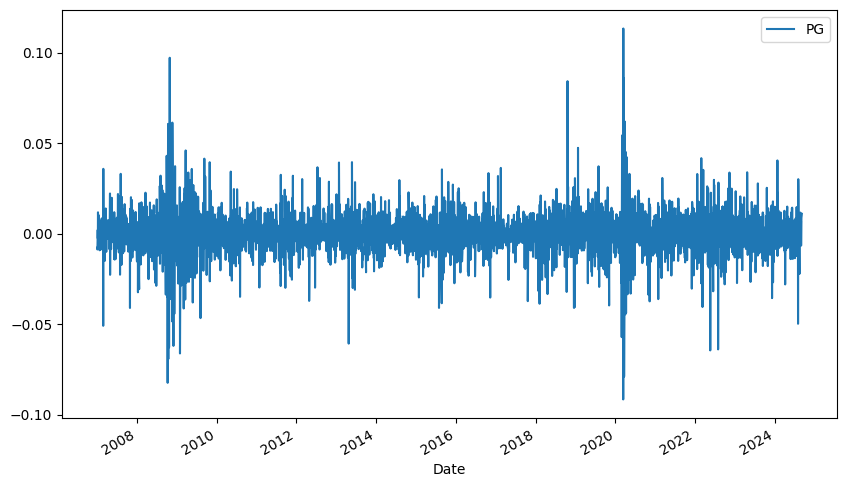

In [50]:
log_returns.plot(figsize=(10,6))

In [51]:
u = log_returns.mean()
var = log_returns.var()

In [52]:
drift = u - (0.5 * var)
drift

PG    0.000269
dtype: float64

In [53]:
stdev = log_returns.std()
stdev

PG    0.011648
dtype: float64

In [54]:
np.array(drift)

array([0.00026873])

In [55]:
norm.ppf(0.95)

np.float64(1.6448536269514722)

In [56]:
x = np.random.rand(10,2)
x

array([[0.16507456, 0.09224727],
       [0.35025304, 0.30805896],
       [0.375659  , 0.46187623],
       [0.61745485, 0.40514531],
       [0.12660753, 0.02991524],
       [0.66495883, 0.13785626],
       [0.80363354, 0.52494994],
       [0.26590232, 0.14716361],
       [0.12376028, 0.96198595],
       [0.26908247, 0.73192624]])

In [57]:
norm.ppf(x)

array([[-0.97381356, -1.32704276],
       [-0.38463739, -0.5013598 ],
       [-0.31690195, -0.09570804],
       [ 0.29880308, -0.24005113],
       [-1.14257506, -1.88204083],
       [ 0.426035  , -1.09000141],
       [ 0.85467169,  0.06258104],
       [-0.62525357, -1.04867609],
       [-1.15639271,  1.77421191],
       [-0.61559033,  0.61864915]])

In [58]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-0.67756643,  0.00375508],
       [-1.02775587,  0.66872873],
       [-0.78931071, -0.46629545],
       [ 0.49788465, -0.84426272],
       [ 1.51350653, -1.55054601],
       [ 0.57131087, -0.18254994],
       [-0.87600518, -1.24591415],
       [-1.49272719,  0.22202543],
       [-1.42831491, -0.32254346],
       [ 0.12290188,  0.97343278]])

In [59]:
t_intervals = 1000
iterations = 10

In [60]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01573817, 0.99100288, 0.9964238 , ..., 1.00011558, 1.00250528,
        0.99852581],
       [1.000949  , 1.01511314, 1.00300304, ..., 0.99840439, 1.00663119,
        0.99962545],
       [0.98513931, 1.01894162, 0.98367901, ..., 1.00172847, 1.00542978,
        0.98983553],
       ...,
       [0.98881508, 0.99190733, 1.01466791, ..., 0.99387451, 0.97855385,
        1.01149163],
       [1.00491331, 0.99747202, 1.01131563, ..., 1.00644568, 0.9947943 ,
        0.9881934 ],
       [0.99623324, 0.99734514, 0.98624608, ..., 0.99541588, 1.00859137,
        1.01549395]])

In [61]:
S0 = data.iloc[-1]
S0

PG    173.449997
Name: 2024-09-03 00:00:00, dtype: float64

In [62]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
price_list[0] = S0

In [64]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [65]:
price_list

array([[173.44999695, 173.44999695, 173.44999695, ..., 173.44999695,
        173.44999695, 173.44999695],
       [173.6146009 , 176.07137046, 173.97087377, ..., 173.17323798,
        174.60017718, 173.38503162],
       [171.03456857, 179.40644677, 171.13149643, ..., 173.47256228,
        175.54821745, 171.6226643 ],
       ...,
       [130.73609695, 264.12166671, 133.81202673, ..., 337.22141714,
        248.03307506, 407.16248422],
       [131.37844345, 263.45397371, 135.32619347, ..., 339.39503709,
        246.74188929, 402.35528151],
       [130.88357265, 262.75454071, 133.46492747, ..., 337.83920948,
        248.86174037, 408.58935437]])

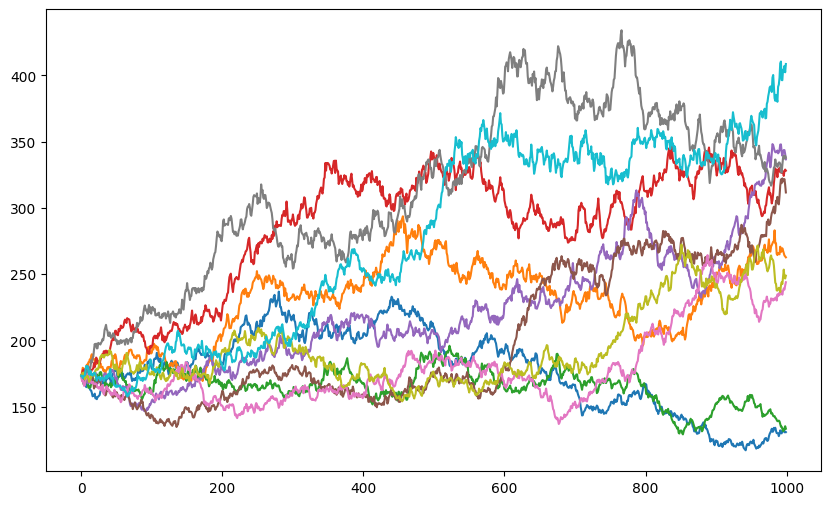

In [66]:
plt.figure(figsize=(10,6))
plt.plot(price_list)